#                       Analytics Industry Salary Prediction

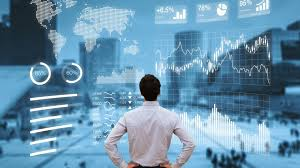

# Importing the required libraries and loading our data...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
train_data=pd.read_csv('Final_Train_Dataset.csv',usecols=['experience', 'job_description', 'job_desig', 'job_type',
       'key_skills', 'location', 'salary', 'company_name_encoded'])

In [3]:
train_data.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [4]:
train_data['job_type'].value_counts() #Since All the Job Types are of type Analytics so we are dropping this column..

Analytics    3747
analytics     921
ANALYTICS      77
analytic       32
Analytic       20
Name: job_type, dtype: int64

In [5]:
train_data['job_type'].fillna('missingjobtype', inplace=True)
train_data['job_type'].replace('Analytics', 'analytics', inplace=True)
train_data['job_type'].replace('Analytic', 'analytics', inplace=True)
train_data['job_type'].replace('ANALYTICS', 'analytics', inplace=True)
train_data['job_type'].replace('analytic', 'analytics', inplace=True)

In [6]:
#We have only a single Nan value in Key_Skills column , so we are directly dropping it
train_data.dropna(subset=['key_skills'],inplace=True)

In [7]:
#Also we would be replacing the Nan Filled Descriptions with "Misssing Description" for the better understanding of Data.
train_data['job_description'].fillna("Missing Description",inplace=True)

In [8]:
#Let's have a look on our Data's Info Now
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19801 entries, 0 to 19801
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            19801 non-null  object
 1   job_description       19801 non-null  object
 2   job_desig             19801 non-null  object
 3   job_type              19801 non-null  object
 4   key_skills            19801 non-null  object
 5   location              19801 non-null  object
 6   salary                19801 non-null  object
 7   company_name_encoded  19801 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [9]:
#Now our Data looks pretty good since there aren't any Nan Values there in it

In [10]:
#Since Our data is quite raw , it requires a bit of cleaning and preprocessing. lets go through that process in next few steps.

# Data Cleaning And Pre-Processing

In [11]:
#Splitting Our Experience into Minimum And Maximum for model to understand better.
train_data['Minimum_experience']=train_data['experience'].apply(lambda x:x.split('-')[0])
train_data['Maximum_experience']=train_data['experience'].apply(lambda x:x.split('-')[1])
train_data['Maximum_experience']=train_data['Maximum_experience'].apply(lambda x:x.split(' ')[0])

In [12]:

#Let's Have a look at some of the Key Skills of the Analytics Industry

In [13]:
print("1:",train_data['key_skills'][2])
print("2",train_data['key_skills'][1])
print("3",train_data['key_skills'][9])
print("4",train_data['key_skills'][18])
print("5",train_data['key_skills'][29])

1: HR Analytics, Employee Engagement, Training, Succession Planning...
2 ppc, logistics, inventory management, supply chain management, procurement,...
3 accounting standards, finance, auditing, financial planning...
4 Information Retrieval, Hadoop, Hive, Spark, Mapreduce, SCALA...
5 Life Insurance, Actuarial, Actuarial Analyst, actuary, Regression Testing...


In [14]:
a = 0 
for i in range(a,a+10):
    print("1.Job Description: \t",train_data['job_description'][i])
    print("2.Job Designation: \t",train_data['job_desig'][i])
    print("3.Key Skills Required: \t",train_data['key_skills'][i])
    print("4.Location: \t\t",train_data['location'][i])
    print("5.Job Type: \t\t",train_data['job_type'][i])
    print("6.Salary Offered: \t",train_data['salary'][i],"LPA")
    print()

1.Job Description: 	 Exp: Minimum 5 years;Good understanding of IOC rules; Must Have:;Good analytical skills;Good ...
2.Job Designation: 	 Senior Exploit and Vulnerability Researcher
3.Key Skills Required: 	 team skills, communication skills, analytical skills, problem solving...
4.Location: 		 Delhi NCR(Vikas Puri)
5.Job Type: 		 missingjobtype
6.Salary Offered: 	 6to10 LPA

1.Job Description: 	 He should have handled a team of atleast 5-6 direct reportees;mechanical or Diploma (mechanical) with at ...
2.Job Designation: 	 Head SCM
3.Key Skills Required: 	 ppc, logistics, inventory management, supply chain management, procurement,...
4.Location: 		 Sonepat
5.Job Type: 		 missingjobtype
6.Salary Offered: 	 10to15 LPA

1.Job Description: 	 Must be an effective communicator (written & spoken) and strong in inter personal relationship & ...
2.Job Designation: 	 Deputy Manager - Talent Management & Leadership Development - Auto
3.Key Skills Required: 	 HR Analytics, Employee Engagement, Tr

In [15]:
#cleaning unecessary tokens in skills for better understanding for algorithms...
def clean_skills(skill):
    skills=str(skill).lower()
    skills=re.sub(r'\...',' ',skills)
    skills=re.sub(r',',' ',skills)
    skills=re.sub('\s+',' ',skills)
    return skills

train_data['Key_Skills']=train_data['key_skills'].apply(clean_skills)

In [16]:
#Since there are a lot of unnecessary tokens in the text, we  have to clean those for further better understanding , so that 
#algorithms learn our data better...
def clean_description(description):
    desc=str(description).lower()
    desc=re.sub(r',',' ',desc)
    desc=re.sub(r'/...',' ',desc)
    desc=re.sub(r'[^a-z]',' ',desc)
    desc=re.sub('\s+',' ',desc)
    return desc


train_data['JOB_DESCRIPTION']=train_data['job_description'].apply(clean_description)

In [17]:
def clean_desig(desig):
    designation=str(desig).lower()
    designation=re.sub('[^a-z]',' ',designation)
    designation=re.sub('\s+',' ',designation)
    return designation

train_data['Job_Desig']=train_data['job_desig'].apply(clean_desig)

In [18]:
def clean_location(loc):
    location = loc.lower()
    location = re.sub(r'[^a-z]', ' ', location)
    location = re.sub(r'\s+', ' ', location)
    return location

train_data['Location'] = train_data['location'].apply(clean_location)

In [19]:
#After Cleaning The Dataset

In [20]:
a = 0 
for i in range(a,a+10):
    print("1.Job Description: \t",train_data['JOB_DESCRIPTION'][i])
    print("2.Job Designation: \t",train_data['Job_Desig'][i])
    print("3.Key Skills Required: \t",train_data['Key_Skills'][i])
    print("4.Location: \t\t",train_data['Location'][i])
    print("5.Job Type: \t\t",train_data['job_type'][i])
    print("6.Salary Offered: \t",train_data['salary'][i],"LPA")
    print()

1.Job Description: 	 exp minimum years good understanding of ioc rules must have good analytical skills good 
2.Job Designation: 	 senior exploit and vulnerability researcher
3.Key Skills Required: 	 team skills communication skills analytical skills problem solving 
4.Location: 		 delhi ncr vikas puri 
5.Job Type: 		 missingjobtype
6.Salary Offered: 	 6to10 LPA

1.Job Description: 	 he should have handled a team of atleast direct reportees mechanical or diploma mechanical with at 
2.Job Designation: 	 head scm
3.Key Skills Required: 	 ppc logistics inventory management supply chain management procurement 
4.Location: 		 sonepat
5.Job Type: 		 missingjobtype
6.Salary Offered: 	 10to15 LPA

1.Job Description: 	 must be an effective communicator written spoken and strong in inter personal relationship 
2.Job Designation: 	 deputy manager talent management leadership development auto
3.Key Skills Required: 	 hr analytics employee engagement training succession planning 
4.Location: 		 del

In [21]:
train_data.drop(['job_description','job_desig','location','key_skills'],1,inplace=True)

In [22]:
train_data.drop(['experience'],1,inplace=True)

In [23]:
#Finding Some Useful Info from our data to help us get better insights

In [24]:
train_data['python_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'python' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['aws_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'aws' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['spark_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'spark' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['hadoop_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'hadoop' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['docker_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'docker' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['sql_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'sql' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['linux_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'linux' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['django_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'django' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['flask_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'flask' in x.lower() else 0)
train_data['tensorflow_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'tensorflow' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['tableau_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'tableau' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....
train_data['ml_yn']=train_data["Key_Skills"].apply(lambda x:1 if 'machine learning' in x.lower() else 0)
#Mapping Whether the person had the specified skills in his Key Skills....

In [25]:
#CHecking the profile of the person...............
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'research' in title.lower():
        return 'research'
    elif 'software' in title.lower():
        return 'sw'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [26]:
def title_number_simplifier(title):
    if 'data scientist' in title.lower():
        return 3
    elif 'data engineer' in title.lower():
        return 2
    elif 'analyst' in title.lower():
        return 1
    elif 'machine learning' in title.lower():
        return 6
    elif 'research' in title.lower():
        return 8
    elif 'software' in title.lower():
        return 9
    elif 'manager' in title.lower():
        return 5
    elif 'director' in title.lower():
        return 4
    else:
        return 7

In [27]:
train_data['JOB_type']=train_data['Job_Desig'].apply(title_simplifier)
train_data['job_type_num']=train_data['Job_Desig'].apply(title_number_simplifier)

In [28]:
#Checking The Seniority of The Employeee....
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'vice president' in title.lower() or 'president' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [29]:
def seniority_num(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'vice president' in title.lower() or 'president' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return '1'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return '0'
    else:
        return '2'

In [30]:
train_data['seniority']=train_data['Job_Desig'].apply(seniority)
train_data['seniority_num']=train_data['Job_Desig'].apply(seniority_num)

In [31]:
#FInally Our PreProcessed data looks somewhat like this...
train_data['desc_len']=train_data['JOB_DESCRIPTION'].apply(lambda x:len(x))

In [32]:
#Splitting The Salary to perform some transformations on data....
train_data['Min_Sal']=train_data['salary'].apply(lambda x:x.split('to')[0])
train_data['Max_Sal']=train_data['salary'].apply(lambda x:x.split('to')[1])

In [33]:
train_data['Min_Sal']=train_data['Min_Sal'].astype(int)
train_data['Max_Sal']=train_data['Max_Sal'].astype(int)
train_data['seniority_num']=train_data['seniority_num'].astype(int)

In [34]:
train_data['Avg_Sal']=(train_data['Min_Sal']+train_data['Max_Sal'])/2

In [35]:
#Some Plots for better Understanding The Data

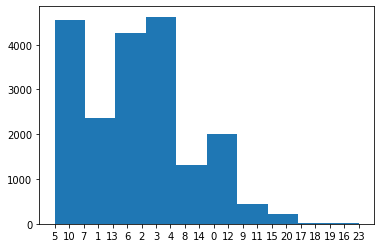

In [36]:
train_data['Minimum_experience'].hist(grid=False) 
#This feature is mostly left skewed so this feature can be gaussian distributed by using various transformations like box-cox , 
#square and log transformation

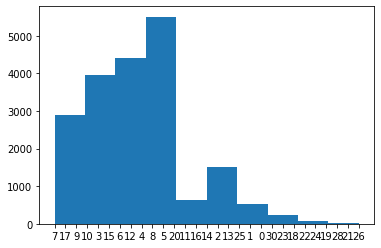

In [37]:
train_data['Maximum_experience'].hist(grid=False)

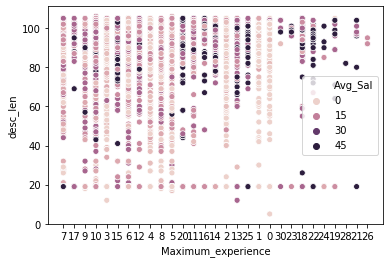

In [38]:
sns.scatterplot(x=train_data['Maximum_experience'],y=train_data.desc_len,hue=train_data['Avg_Sal'])

In [39]:
df_cat=train_data[['python_yn','aws_yn','spark_yn', 'hadoop_yn', 'docker_yn',
       'sql_yn', 'linux_yn', 'flask_yn', 'django_yn', 'tensorflow_yn','tableau_yn','ml_yn',
       'JOB_type', 'seniority']]

graph for python_yn: total = 2


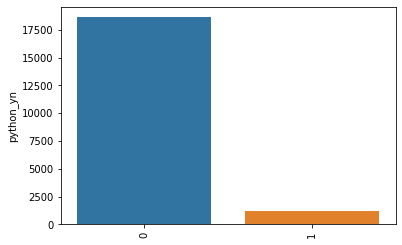

graph for aws_yn: total = 2


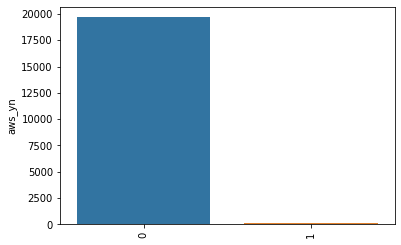

graph for spark_yn: total = 2


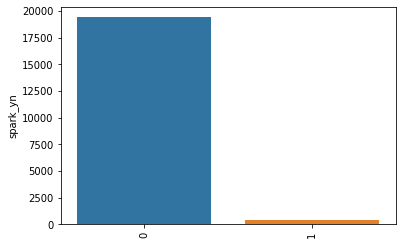

graph for hadoop_yn: total = 2


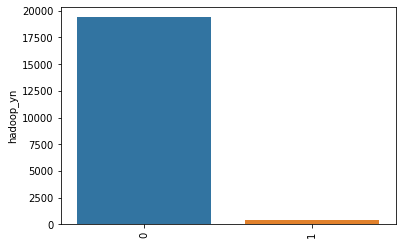

graph for docker_yn: total = 2


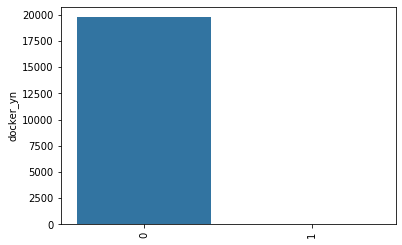

graph for sql_yn: total = 2


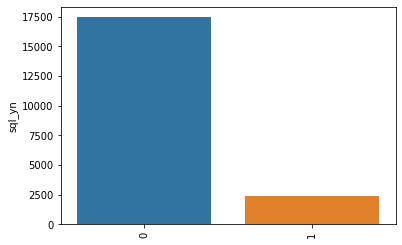

graph for linux_yn: total = 2


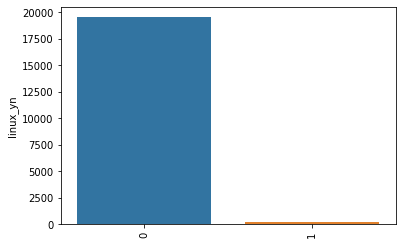

graph for flask_yn: total = 2


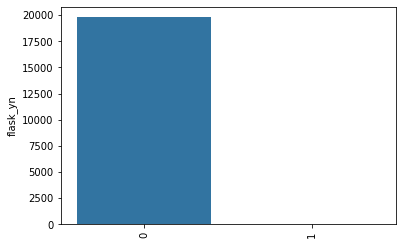

graph for django_yn: total = 2


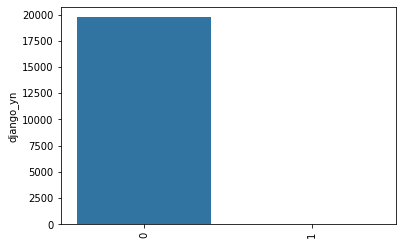

graph for tensorflow_yn: total = 2


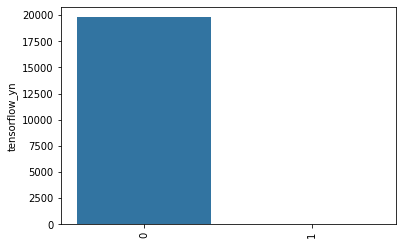

graph for tableau_yn: total = 2


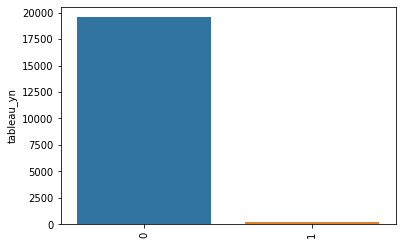

graph for ml_yn: total = 2


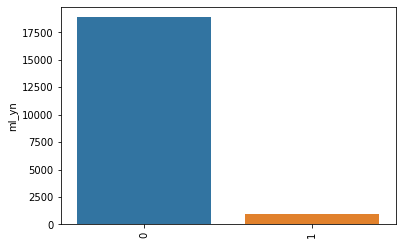

graph for JOB_type: total = 9


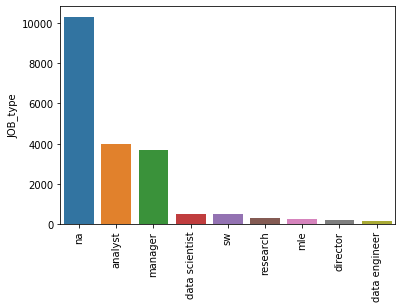

graph for seniority: total = 3


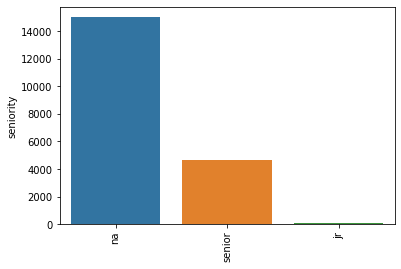

In [40]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

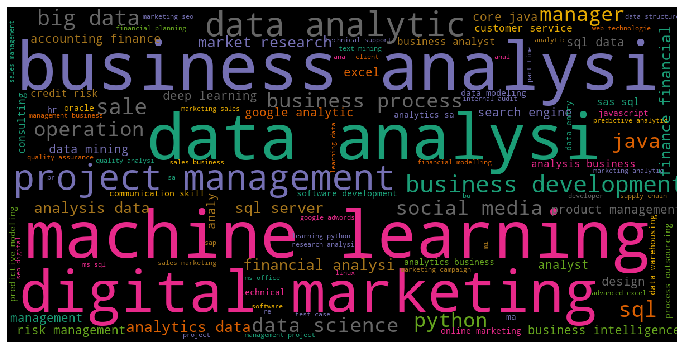

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        colormap='Dark2',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train_data['Key_Skills'])

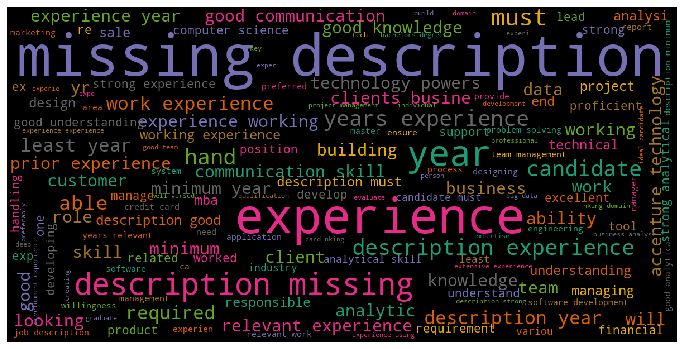

In [42]:
show_wordcloud(train_data['JOB_DESCRIPTION'])

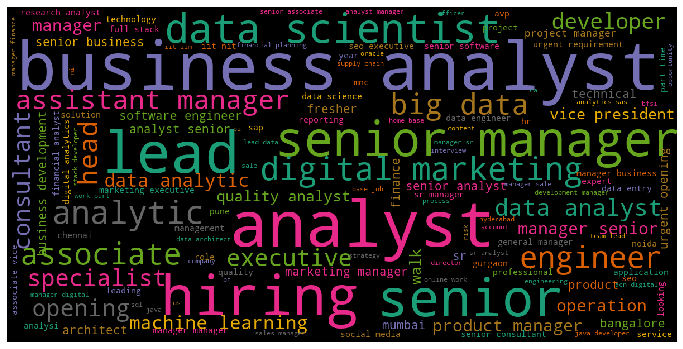

In [43]:
show_wordcloud(train_data['Job_Desig'])

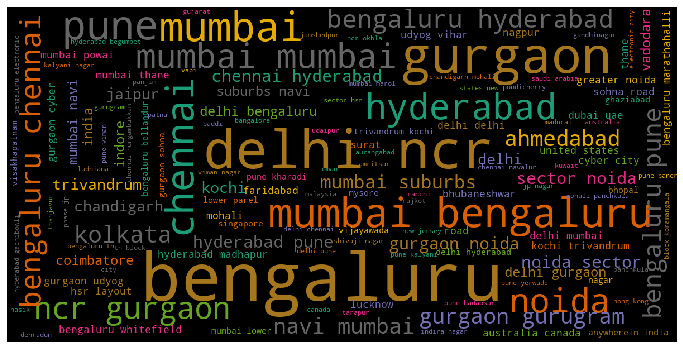

In [44]:
show_wordcloud(train_data['Location'])

In [45]:
#Finding UniGrams,BiGrams,TriGrams....

In [46]:
import plotly as py
import cufflinks as  cf 

In [47]:
from plotly.offline import iplot

In [48]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [49]:
from textblob import TextBlob

In [50]:
train_data['polarity']=train_data['JOB_DESCRIPTION'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [51]:
train_data['description_len']=train_data['JOB_DESCRIPTION'].apply(lambda x:len(x))

In [52]:
train_data['word_count']=train_data['JOB_DESCRIPTION'].apply(lambda x:len(x.split()))

In [53]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len+len(word)
        
    return word_len/len(words)    

In [54]:
train_data['avg_word_len']=train_data['JOB_DESCRIPTION'].apply(lambda x:get_avg_word_len(x))

In [55]:
train_data['polarity'].iplot(kind='hist',colors='red',bins=50)

In [56]:
train_data['Minimum_experience'].iplot(kind='hist',xTitle='Minimum Experience',yTitle='Count',title='Minimum Experience among the Employees',colors='aqua',linecolor='red')

In [57]:
train_data['Maximum_experience'].iplot(kind='hist',xTitle='Maximum Experience',yTitle='Count',title='Maximum Experience among the Employees',colors='magenta',linecolor='yellow')

In [58]:
train_data['description_len'].iplot(kind='hist',xTitle='Description Length',yTitle='Count',title='Description text Length')

In [59]:
train_data['word_count'].iplot(kind='hist',xTitle='Word Count',yTitle='Count',title='Word Count distribution')

In [60]:
#Distribution Of UniGrams,BiGrams and Tri Grams

#unigram:this,is,a,test,example
#bigram:this is,is a,a test,test example
#trigram:this is a, is a test, a test example

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
x=['this is the list list this']

In [62]:
vec=CountVectorizer().fit(x)

In [63]:
bow=vec.transform(x)
sum_words=bow.sum(axis=0)
vec.vocabulary_.items()

dict_items([('this', 3), ('is', 0), ('the', 2), ('list', 1)])

In [64]:
sum_words

matrix([[1, 2, 1, 2]], dtype=int64)

In [65]:
from nltk.corpus import stopwords

In [66]:
def get_top_n_words(x,n):
    vec=CountVectorizer().fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    final_words=[word for word in words_freq if word not in set(stopwords.words('english'))]
    return final_words[:n]

In [67]:
desc_top=get_top_n_words(train_data['JOB_DESCRIPTION'],20)

In [68]:
df1=pd.DataFrame(desc_top,columns=['Unigram','Frequency'])
df1=df1.set_index('Unigram')
df1.iplot(kind='bar',xTitle='Unigram',yTitle='Count',title='Top 20 unigram words',linecolor='blue')

In [69]:
def get_top_n5_words(x,n):
    vec=CountVectorizer(ngram_range=(2,2),stop_words='english').fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
#     final_words=[word for word in words_freq if word not in set(stopwords.words('english'))]
    return words_freq[:n]

In [70]:
desigs=get_top_n5_words(train_data['Job_Desig'],20)

In [71]:
df4=pd.DataFrame(desigs,columns=['Job Designations','Frequency'])
df4=df4.set_index('Job Designations')
df4.iplot(kind='bar',xTitle='Designation',yTitle='Count',title='Most Famous Designations in Analytics Industry',color='green',linecolor='aqua')

### The following graph shows the density of different minimum and maximum experienced required

In [72]:
def get_ax(rows = 1,cols = 1,size = 7):
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows),squeeze = False)
    return fig,ax

Text(0.5, 1.0, 'Variation in experience')

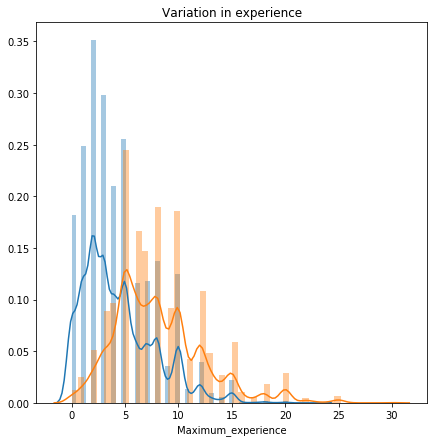

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = get_ax()
ax = ax.flatten()
sns.distplot(train_data.Minimum_experience,ax = ax[0])
sns.distplot(train_data.Maximum_experience,ax = ax[0]).set_title('Variation in experience')

In [74]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [75]:
df=train_data.copy()

In [76]:
y=df.salary

In [77]:
df = df.drop(['salary'],axis = 1)

In [78]:
df.head(2)

,job_type,company_name_encoded,Minimum_experience,Maximum_experience,Key_Skills,JOB_DESCRIPTION,Job_Desig,Location,python_yn,aws_yn,spark_yn,hadoop_yn,docker_yn,sql_yn,linux_yn,django_yn,flask_yn,tensorflow_yn,tableau_yn,ml_yn,JOB_type,job_type_num,seniority,seniority_num,desc_len,Min_Sal,Max_Sal,Avg_Sal,polarity,description_len,word_count,avg_word_len
0,missingjobtype,3687,5,7,team skills communication skills analytical sk...,exp minimum years good understanding of ioc ru...,senior exploit and vulnerability researcher,delhi ncr vikas puri,0,0,0,0,0,0,0,0,0,0,0,0,research,8,senior,1,88,6,10,8.0,0.7,88,14,5.285714
1,missingjobtype,458,10,17,ppc logistics inventory management supply chai...,he should have handled a team of atleast direc...,head scm,sonepat,0,0,0,0,0,0,0,0,0,0,0,0,na,7,na,2,99,10,15,12.5,0.1,99,16,5.187500


In [79]:
df.columns

Index(['job_type', 'company_name_encoded', 'Minimum_experience',
       'Maximum_experience', 'Key_Skills', 'JOB_DESCRIPTION', 'Job_Desig',
       'Location', 'python_yn', 'aws_yn', 'spark_yn', 'hadoop_yn', 'docker_yn',
       'sql_yn', 'linux_yn', 'django_yn', 'flask_yn', 'tensorflow_yn',
       'tableau_yn', 'ml_yn', 'JOB_type', 'job_type_num', 'seniority',
       'seniority_num', 'desc_len', 'Min_Sal', 'Max_Sal', 'Avg_Sal',
       'polarity', 'description_len', 'word_count', 'avg_word_len'],
      dtype='object')

In [80]:
df['main'] = df[['job_type', 'Key_Skills', 'JOB_DESCRIPTION', 'Job_Desig']].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [81]:
main = pd.Series.to_frame(df['main'])

### This graph shows TOP- 10 parts of speech used in the text data -

CC - coordinating conjunction <br>
CD - cardinal digit<br>
DT - determiner<br>
EX - existential there (like: “there is” … think of it like “there exists”)<br>
FW - foreign word<br>
IN - preposition/subordinating conjunction<br>
JJ - adjective ‘big’<br>
NN - noun, singular ‘desk’<br>
NNS - noun plural ‘desks’<br>
NNP - proper noun, singular ‘Harrison’<br>
NNPS - proper noun, plural ‘Americans’<br>
PRP - personal pronoun I, he, she<br>
RB - adverb very, silently,<br>
RBR - adverb, comparative better<br>
RP - particle give up<br>
VB - verb, base form take<br>
VBN - verb, past participle taken<br>
VBP - verb, sing. present, non-3d take<br>


Text(0.5, 1.0, 'Top 10 Part-of-speech tagging for main corpus')

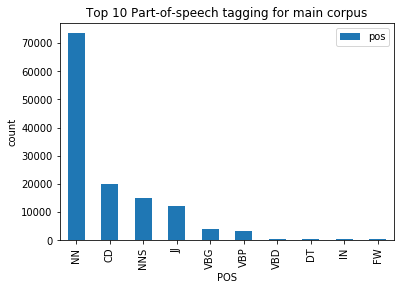

In [82]:
from textblob import TextBlob
blob = TextBlob(str(main))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:10]
pos_df = pd.Series.to_frame(pos_df)
pos_viz = pos_df.plot(
    kind='bar'
   )

pos_viz.set_xlabel("POS")
pos_viz.set_ylabel("count")
pos_viz.set_title("Top 10 Part-of-speech tagging for main corpus")

In [83]:
def min_sal(sal):
    val = str(sal).split("to")
    return val[0]
def max_sal(sal):
    val = str(sal).split("to")
    return val[1]

minsal = train_data["salary"].apply(lambda x: min_sal(x))
max_sal = train_data["salary"].apply(lambda x: max_sal(x))

In [84]:
x = pd.DataFrame({"min_sal":minsal,
                  "max_sal":max_sal})

### The following graph shows the density of different minimum and maximum salary offered

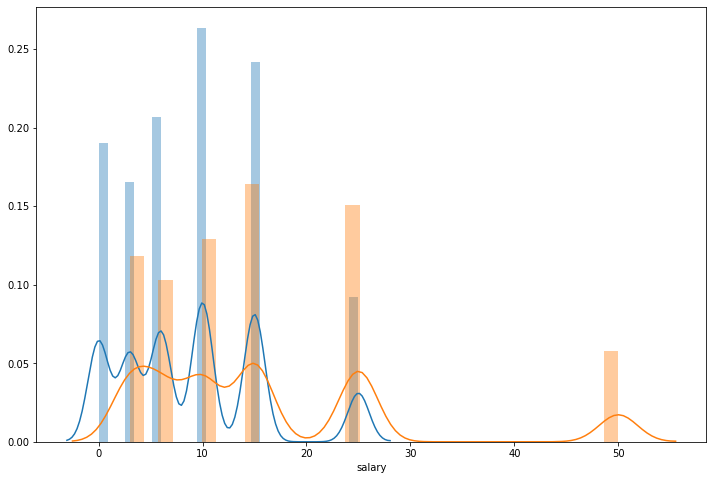

In [85]:
fig,ax = plt.subplots(1,1 ,figsize = (12,8))
sns.distplot(minsal)
sns.distplot(max_sal)

In [86]:
### The following graph shows which city has most number of jobs

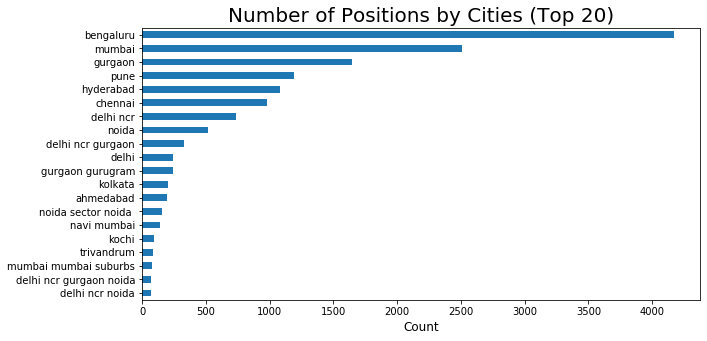

In [87]:
city = df.groupby(['Location']).count().sort_values('job_type').tail(20)

city['job_type'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 20)', size = 20)
plt.show()

### The following graph shows which company has the most number of job openings / working employee

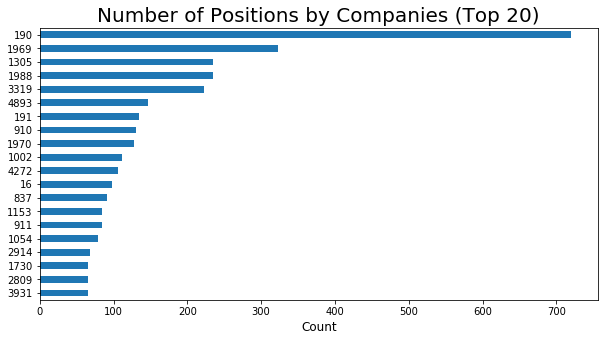

In [88]:

company = train_data.groupby(['company_name_encoded']).count().sort_values('salary').tail(20)
company['salary'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

### The following pie chart shows the distribution of salary as a whole in six different classes

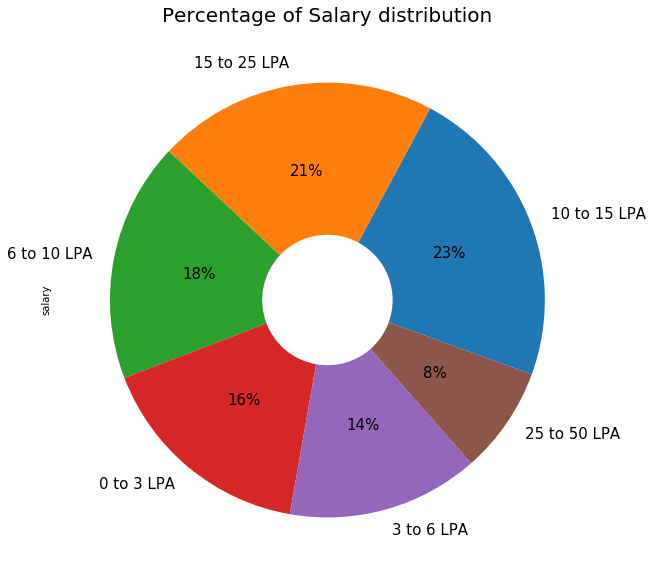

In [89]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Salary distribution', fontsize=20)
train_data.salary.value_counts().plot(kind='pie', labels=['10 to 15 LPA', '15 to 25 LPA', '6 to 10 LPA', '0 to 3 LPA', '3 to 6 LPA','25 to 50 LPA '],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})